In [212]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
data=pd.read_csv("data.csv")

In [158]:
data=data.dropna()
data=data.drop_duplicates()
original=data.copy()

In [159]:
#train,test,ttrain,ttest=train_test_split()
target=data['grade']
data=data.drop(['grade'],axis=1)

In [160]:
mapping = {
    "school":{"MS":0,"GP":1},
    "sex":{"M":0,"F":1},
    "address":{"U":0,"R":1},
    "famsize":{"LE3":0,"GT3":1},
    "Pstatus":{"T":0,"A":1},
    "Mjob":{"teacher":0,"health":1,"services":2,"at_home":3,"other":4},
    "Fjob":{"teacher":0,"health":1,"services":2,"at_home":3,"other":4},
    "reason":{"home":0,"reputation":1,"course":2,"other":3},
    "guardian":{"father":0,"mother":1,"other":2},
    "schoolsup":{"yes":0,"no":1},
    "famsup":{"yes":0,"no":1},
    "paid":{"yes":0,"no":1},
    "activities":{"yes":0,"no":1},
    "nursery":{"yes":0,"no":1},
    "higher":{"yes":0,"no":1},
    "internet":{"yes":0,"no":1},
    "romantic":{"yes":0,"no":1}
    
}
data_numeric=data.replace(mapping)

In [161]:
train,ttrain,test,ttest=train_test_split(data_numeric,target,test_size=0.2,random_state=42)

In [162]:
model1=LogisticRegression(max_iter=500000)
model1.fit(train,test)

LogisticRegression(max_iter=500000)

In [163]:
model1.score(ttrain,ttest)

0.42857142857142855

In [164]:
model2=svm.SVC(gamma=0.001, C=100.)
model2.fit(train,test)

SVC(C=100.0, gamma=0.001)

In [165]:
model2.score(ttrain,ttest)

0.4

In [166]:
k=10
model1scores=[]
for i in range(k):
    train,ttrain,test,ttest=train_test_split(data_numeric,target,test_size=0.2,random_state=42+i)
    model1=LogisticRegression(max_iter=50000)
    model1.fit(train,test)
    model1scores.append(model1.score(ttrain,ttest))

<AxesSubplot:>

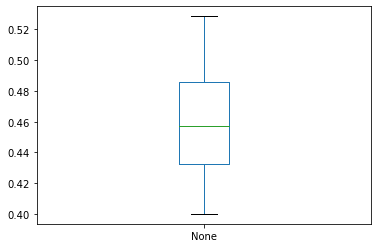

In [167]:
pd.Series(model1scores).plot.box()

In [168]:
k=10
model2scores=[]
for i in range(k):
    train,ttrain,test,ttest=train_test_split(data_numeric,target,test_size=0.2,random_state=42+i)
    model2=svm.SVC(gamma=0.001, C=100.)
    model2.fit(train,test)
    model2scores.append(model2.score(ttrain,ttest))

In [169]:
model2scores

[0.4,
 0.38571428571428573,
 0.37142857142857144,
 0.38571428571428573,
 0.42857142857142855,
 0.4142857142857143,
 0.34285714285714286,
 0.37142857142857144,
 0.4142857142857143,
 0.4142857142857143]

<AxesSubplot:>

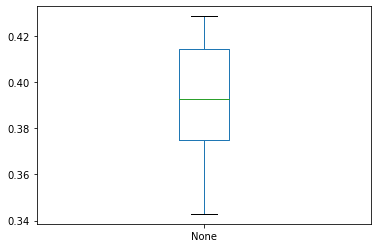

In [170]:
pd.Series(model2scores).plot.box()

In [171]:
kfold=pd.DataFrame()
kfold['Logistic']=pd.Series(model1scores)
kfold['SVM']=pd.Series(model2scores)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fda849057c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fda84905e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fda84905430>,
 'medians': [<matplotlib.lines.Line2D at 0x7fda84911580>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fda849118e0>,
 'means': []}

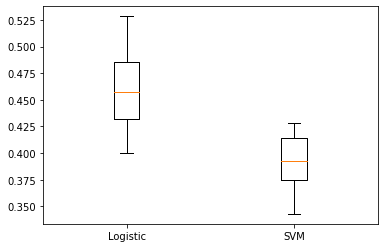

In [172]:
plt.boxplot(kfold,labels=['Logistic','SVM'])

In [173]:
original.groupby('grade').grade.count()


grade
A     39
B     91
C    189
D     22
E      7
Name: grade, dtype: int64

<AxesSubplot:>

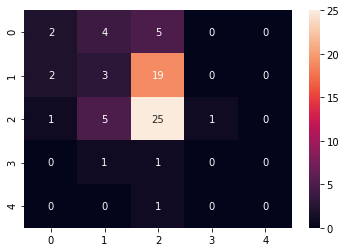

In [215]:
train,ttrain,test,ttest=train_test_split(data_numeric,target,test_size=0.2,random_state=42)
model1=LogisticRegression(max_iter=500000)
model1.fit(train,test)
cf_matrix = confusion_matrix(ttest, model1.predict(ttrain))
sns.heatmap(cf_matrix,annot=True)

<AxesSubplot:>

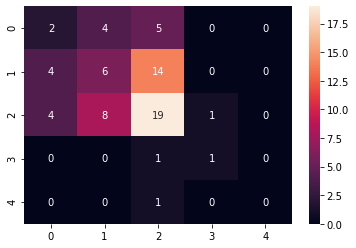

In [214]:
train,ttrain,test,ttest=train_test_split(data_numeric,target,test_size=0.2,random_state=42)
model2=svm.SVC(gamma=0.001, C=100.)
model2.fit(train,test)
cf_matrix = confusion_matrix(ttest, model2.predict(ttrain))
sns.heatmap(cf_matrix,annot=True)